Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded successfully.

📊 Model Evaluation Metrics:
Mean Squared Error (MSE): 76484977061.78
Root Mean Squared Error (RMSE): 276559.17
R-squared Score (R²): 0.49


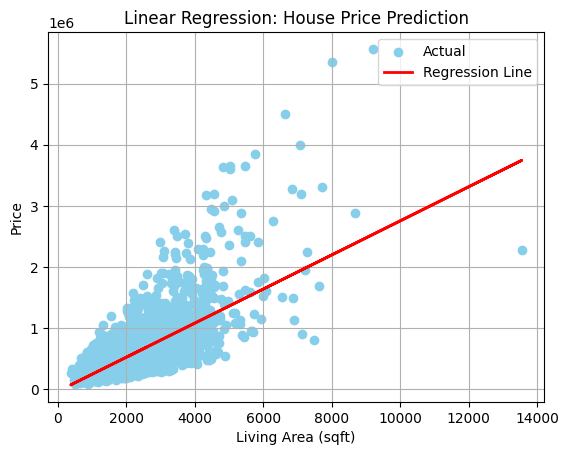

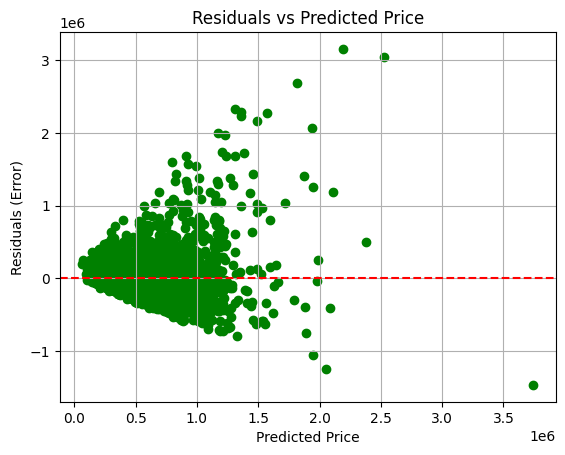

In [ ]:
  # Step 0: Import Libraries
  from google.colab import drive
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score
  import matplotlib.pyplot as plt

  # Step 1: Mount Google Drive (for dataset access)
  drive.mount('/content/drive')

  # Step 2: Load the Dataset
  file_path = '/content/drive/My Drive/kc_house_data.csv/kc_house_data.csv'

  try:
      df = pd.read_csv(file_path)
      print("Dataset loaded successfully.\n")
  except FileNotFoundError:
      print(f"Error: File not found at: {file_path}")
      exit()

  # Step 3: Select Features and Target
  X = df[['sqft_living']]  # Input feature: square footage
  y = df['price']          # Target: house price

  # Step 4: Split into Training and Testing Sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Step 5: Train Linear Regression Model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Step 6: Make Predictions
  y_pred = model.predict(X_test)

  # Step 7: Evaluate the Model
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse ** 0.5
  r2 = r2_score(y_test, y_pred)

  print("📊 Model Evaluation Metrics:")
  print("Mean Squared Error (MSE):", round(mse, 2))
  print("Root Mean Squared Error (RMSE):", round(rmse, 2))
  print("R-squared Score (R²):", round(r2, 2))

  # Step 8: Plot Regression Line
  plt.scatter(X_test, y_test, color='skyblue', label='Actual')
  plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
  plt.xlabel('Living Area (sqft)')
  plt.ylabel('Price')
  plt.title('Linear Regression: House Price Prediction')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Step 9: Plot Residuals
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals, color='green')
  plt.axhline(y=0, color='red', linestyle='--')
  plt.xlabel("Predicted Price")
  plt.ylabel("Residuals (Error)")
  plt.title("Residuals vs Predicted Price")
  plt.grid(True)
  plt.show()
